# Assignment 4- Data Processing

__Note:__ _This assignment may optionally by done as pairs for students in 4510; this is particularly recommended for students who don't have as strong a background in Python and/or databases.  Students enrolled in 8515 should work individually._

The goal of this assignment is to experiment with loading and pre-processing data from external sources (i.e. as opposed to using the "built-in" datasets that come with SKLearn as we have done in the past).

This notebook is fairly minimal, but it loads the data using Pandas (see https://pandas.pydata.org/pandas-docs/stable/ for documentation).  Be sure you've downloaded the data file from Blackboard and put it in the same folder as this scaffolding.  It's also worth checking out the example from class (available in annotated form in the Content area), which demonstrates a bunch of operations that you might find useful here.

A major point of this assignment is to learn about exploratory data analysis and data cleaning; a secondary part is to begin to familiarize yourself with the Pandas library, which is very useful for doing this type of data processing.  The provided dataset represents temperature data collected from three different weather stations in the Philadelphia area, with one sample per month at each station.  However, there are a number of missing values, and also a number of readings that are clearly incorrect (e.g. consider the min/max values for the temperature column and see if they're realistic).  The data also has a number of extra columns that will not be useful for the current problem, but might be useful under other circumstances.

The goal is to create a data set with a single (clean) row of values for each date.  If you have 'good' values from all three weather stations, you should use the average of those values; however, you need to be careful not to let the 'bad' data mess up your estimates.  E.g. if there's a missing value, you want to take the average of the two good values (as opposed to adding the two good values and then dividing by three); if there's a clearly mistaken measurement, you likewise don't want to include that in the average.

Note that you need to do this for each of the three temperature columns, TMIN, TMAX, and TAVG.  Once you have created this cleaned version of the data set, you should generate a few simple plots to look at the resulting data, including a line graph that shows how the temperatures (monthly low, high, and average) have evolved over the time period included in the data, and a box plot showing the distribution of the data from each of those three columns.

In [1]:
# CSC 4510 - Machine Learning
# Assignment 4
# Scaffolding by Dr. Ben Mitchell
# Assignment completed by: <YOUR NAME(S) HERE>
# Resources used: 
#   <List any resources you used beyond the ones posted on Blackboard>
#   <This can include books, websites, other students, etc.>
#   https://pandas.pydata.org/pandas-docs
#   

In [3]:
import pandas as pd # database loading and manipulation library
import numpy as np # numeric python lybrary
import matplotlib.pyplot as plt # plotting and graphing library
%matplotlib notebook # tell the plotting library we're running an interactive notebook
from statistics import mean 
from statistics import stdev # import stats

UsageError: unrecognized arguments: # tell the plotting library we're running an interactive notebook


### Note the way we load this file
If we just do read_csv() normally, the "date" column will just be a text string.  To take advantage of Pandas' Date object type, we can ask the file reader to parse that column as dates, which will result in date objects that are easier to work with.

In [4]:
data = pd.read_csv('temperaturesRaw.csv', parse_dates=['DATE'])

In [5]:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-01-01,NaN,NaN,4.69,",,,X",25.9,",X",32.8,",,,X",19.1,",,,X"
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-02-01,NaN,NaN,2.84,",,,X",31.8,",X",40.2,",,,X",23.3,",,,X"
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-03-01,NaN,NaN,3.76,",,,X",43.8,",X",54.5,",,,X",33.2,",,,X"
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-04-01,NaN,NaN,3.93,",,,X",52.0,",X",62.2,",,,X",41.7,",,,X"
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-05-01,NaN,NaN,7.41,",,,0",61.9,",0",71.3,",,,0",52.5,",,,0"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 16 columns):
STATION            3399 non-null object
NAME               3399 non-null object
LATITUDE           3399 non-null float64
LONGITUDE          3399 non-null float64
ELEVATION          3399 non-null float64
DATE               3399 non-null datetime64[ns]
AWND               409 non-null float64
AWND_ATTRIBUTES    409 non-null object
PRCP               3331 non-null float64
PRCP_ATTRIBUTES    3331 non-null object
TAVG               3261 non-null float64
TAVG_ATTRIBUTES    3290 non-null object
TMAX               3285 non-null float64
TMAX_ATTRIBUTES    3315 non-null object
TMIN               3307 non-null float64
TMIN_ATTRIBUTES    3336 non-null object
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 425.0+ KB


In [7]:
data['PRCP'].max()

19.31

### TimeDate objects are flexible
You can treat them as units, but its also easy to pull out the components using properties (see https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components)

In [8]:
data['DATE'][0]

Timestamp('1948-01-01 00:00:00')

In [9]:
print('first row year is', data['DATE'][0].year, 'first row month is', data['DATE'][0].month)

first row year is 1948 first row month is 1


## From here it's up to you
Your job is to explore the data, figure out what's wrong with it, produce a cleaned version which also combines the values from the three weather stations, and then show some nice graphs and charts demonstating the properties that the cleaned-up version of the data has (e.g. a plot of how temperatures have changed over time, a box-plot showing means/medians/ranges, etc.).

This will be a process much like we went through in class, so the notebook from class is a good reference, though please note that your version should contain markdown (in class, I essentially gave the "markdown" as a verbal presentation rather than in writing).

Since a big part of the point of exploratory data analysis is to experiment and then explain those experiments and their results, you're going to need to annotate your code (using Markdown cells); I'm looking for not just code here, but also an explanation of the reasoning behind the code.  Again, the example using the Titanic data is a good reference for how this might work.

***

According to the NOAA documentation, AWND is the average wind speed, PRCP is the total precipitation, TAVG is the monthly average temperature, TMIN and TMAX are the monthly min and max temperatures.  The ATTRIBUTES columns give extra information about the associated column.  Full documentation can be found at https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy_documentation.pdf but for this assignment it's safe to just ignore the ATTRIBUTES columns.

It's fine to drop columns that you're not using for your analysis, particularly if they seem to be distracting and/or not really meaningful in the conjoined version of the data.

In [10]:
# First, let's drop data that is not necessary for analysis. I believe lat/long, station & elevation are not 
# factors here since these are all in Philadelphia

In [11]:
cleaned_data = data.copy() # make a copy to prevent changing the original table

In [12]:
cleaned_data.keys().values

array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'AWND', 'AWND_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES'], dtype=object)

In [13]:
cleaned_data = data.drop(columns=['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND_ATTRIBUTES', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES'])

In [14]:
cleaned_data.head()

,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-01-01,NaN,4.69,25.9,32.8,19.1
1,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-02-01,NaN,2.84,31.8,40.2,23.3
2,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-03-01,NaN,3.76,43.8,54.5,33.2
3,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-04-01,NaN,3.93,52.0,62.2,41.7
4,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-05-01,NaN,7.41,61.9,71.3,52.5


In [15]:
# Next, i'll be looking for anomalies in each column by comparing the mean and standard deviation. I'll be 
# taking advantage of Panda's built in functions
mean_arr = [] # array to store averages

In [16]:
for i in range(2, len(cleaned_data.keys())): # excluding the first two columns
    sel_col = cleaned_data.keys().values[i]
    col_avg = cleaned_data[sel_col].mean()
    col_stdev = cleaned_data[sel_col].std()
    col_min = cleaned_data[sel_col].min()
    col_max = cleaned_data[sel_col].max()
    print(cleaned_data.keys().values[i])
    print('mean: '+  str(col_avg) + '| standard dev: ' + str(col_stdev) + '| min: ' + str(col_min) + '| max: ' + str(col_max))
    mean_arr.append(col_avg)

AWND
mean: 9.261858190709047| standard dev: 1.297116889466356| min: 5.8| max: 13.6
PRCP
mean: 3.711332933053142| standard dev: 2.0653112877356814| min: 0.02| max: 19.31
TAVG
mean: 53.54958601655946| standard dev: 19.02791613971366| min: -84.9| max: 185.9
TMAX
mean: 63.49059360730607| standard dev: 19.652023814219792| min: -71.7| max: 201.4
TMIN
mean: 43.3349863925008| standard dev: 18.414772224444057| min: -88.7| max: 185.7


In [17]:
# replace NaN  with average values
count = 0
for i in range(2, len(cleaned_data.keys())):
    sel_col = cleaned_data.keys().values[i]
    cleaned_data[sel_col].fillna(mean_arr[count], inplace=True)
    count += 1
cleaned_data.head()

,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-01-01,9.261858,4.69,25.9,32.8,19.1
1,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-02-01,9.261858,2.84,31.8,40.2,23.3
2,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-03-01,9.261858,3.76,43.8,54.5,33.2
3,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-04-01,9.261858,3.93,52.0,62.2,41.7
4,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-05-01,9.261858,7.41,61.9,71.3,52.5


In [18]:
# insert average values into existing negative values
count = 0
for i in range(2, len(cleaned_data.keys())):
    sel_col = cleaned_data.keys().values[i]
    cleaned_data[sel_col][cleaned_data[sel_col] < 0] = mean_arr[count]
    count += 1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
# mins removed
print(data['TMAX'].min())
print(cleaned_data['TMAX'].min())

-71.7
27.2


In [20]:
# Cleaned up table with negatives and Nan values replaced
cleaned_data.head()

,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-01-01,9.261858,4.69,25.9,32.8,19.1
1,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-02-01,9.261858,2.84,31.8,40.2,23.3
2,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-03-01,9.261858,3.76,43.8,54.5,33.2
3,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-04-01,9.261858,3.93,52.0,62.2,41.7
4,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",1948-05-01,9.261858,7.41,61.9,71.3,52.5


In [21]:
# To plot, we need to convert the date to a Pandas timestamp
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['DATE'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 7 columns):
NAME    3399 non-null object
DATE    3399 non-null datetime64[ns]
AWND    3399 non-null float64
PRCP    3399 non-null float64
TAVG    3399 non-null float64
TMAX    3399 non-null float64
TMIN    3399 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 186.0+ KB


In [22]:
# Matlab plot utilized the index as the X-axis, so we need to put date as the index
cleaned_data.index

RangeIndex(start=0, stop=3399, step=1)

In [23]:
cleaned_data.set_index('DATE').head()

,NAME,AWND,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1948-01-01,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",9.261858,4.69,25.9,32.8,19.1
1948-02-01,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",9.261858,2.84,31.8,40.2,23.3
1948-03-01,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",9.261858,3.76,43.8,54.5,33.2
1948-04-01,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",9.261858,3.93,52.0,62.2,41.7
1948-05-01,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",9.261858,7.41,61.9,71.3,52.5


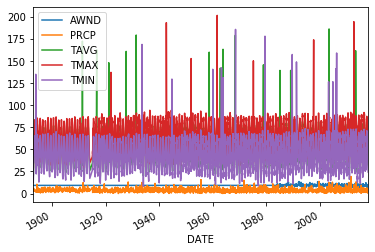

In [24]:
# Let's plot
cleaned_data.set_index('DATE').plot();

In [25]:
# It's hard to see exactly what's going on here. I'm going to make seperate plots for each column to 
# see more closely what's going on

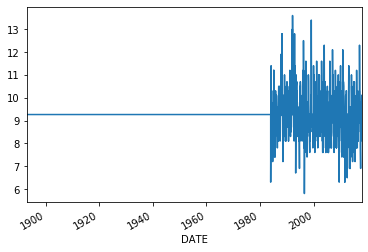

In [26]:
# Average wind speed
cleaned_data.set_index('DATE')['AWND'].plot();

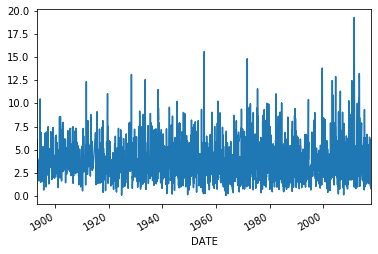

In [27]:
# Precipitation
cleaned_data.set_index('DATE')['PRCP'].plot();

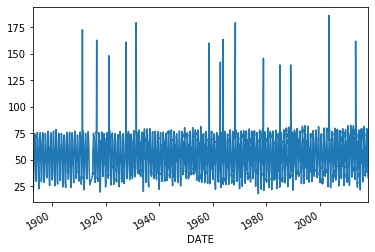

In [28]:
# Temperature Average
cleaned_data.set_index('DATE')['TAVG'].plot();

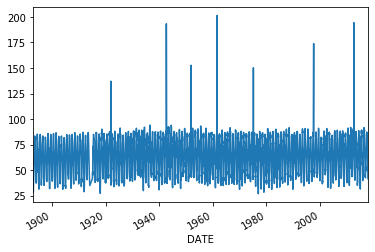

In [29]:
# Temperature Maximum
cleaned_data.set_index('DATE')['TMAX'].plot();

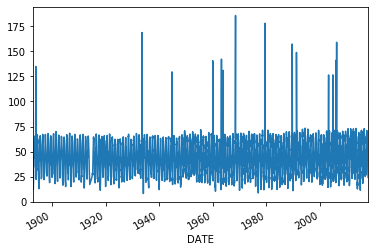

In [30]:
# Temperature minimum
cleaned_data.set_index('DATE')['TMIN'].plot();

## Analysis
From the graphs, it's clear there's some more cleaning to do. For starters, average wind speed data collection does not start until the 1980s. However, it would be a waste to drop all the other data that is being collected since 1900 just to be in parity with average wind speed. Also, there are some anomalies in the data left. For example, there's minimum temperature recording over 175 F, which is ridiculous. These values will have to be replaced.

I also noticed that I grouped together precipitation and wind speed along with temperatures, which doesn't make sense. 

To remove anomalous data, I will replace the value with the mean. To detect the anomalous value in the data, I will look for all values outside of 3$\sigma$ and replace that. This has the advantage of detecting outliers in the dataset but with the drawback of "trimming" the edges of the dataset



In [31]:
# insert average values into values over than 3sigma
count = 0
for i in range(2, len(cleaned_data.keys())):
    sel_col = cleaned_data.keys().values[i]
    three_sigma = [cleaned_data[sel_col].mean() - cleaned_data[sel_col].std() * 3, cleaned_data[sel_col].mean() + cleaned_data[sel_col].std()*3]
    cleaned_data[sel_col][cleaned_data[sel_col] < three_sigma[0]] = mean_arr[count]
    cleaned_data[sel_col][cleaned_data[sel_col] > three_sigma[1]] = mean_arr[count]
    count += 1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


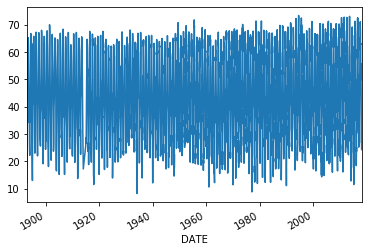

In [32]:
# let's see how the plot looks like with anomalous data replaced
cleaned_data.set_index('DATE')['TMIN'].plot();

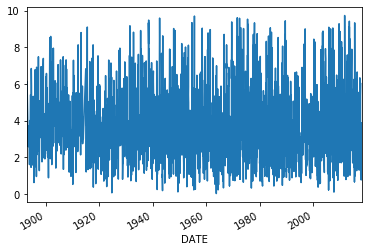

In [33]:
cleaned_data.set_index('DATE')['PRCP'].plot();

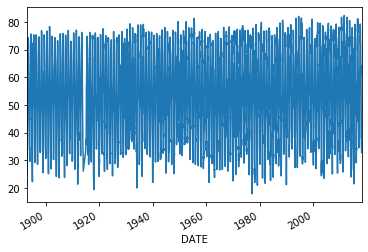

In [34]:
cleaned_data.set_index('DATE')['TAVG'].plot();

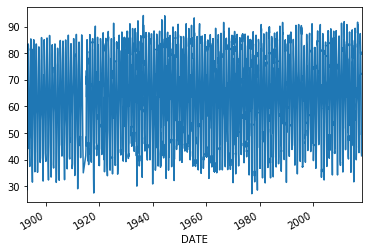

In [35]:
cleaned_data.set_index('DATE')['TMAX'].plot();

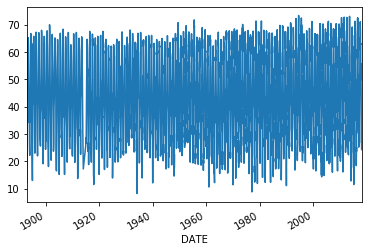

In [36]:
cleaned_data.set_index('DATE')['TMIN'].plot();

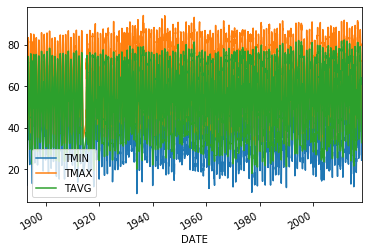

In [37]:
scatter_cols = cleaned_data[['TMIN', 'TMAX', 'TAVG', 'DATE']]
scatter_cols.set_index('DATE').plot();

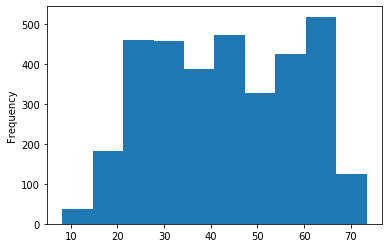

In [38]:
# let's see the distribution of one of these plots
cleaned_data.set_index('DATE')['TMIN'].plot.hist(bins=10)

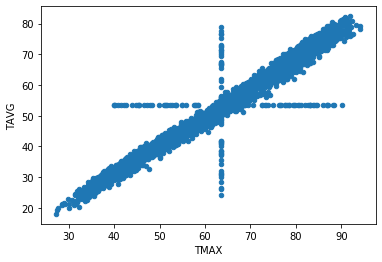

In [39]:
# Now for a scatter plot
scatter_cols.plot.scatter(x='TMAX', y='TAVG')

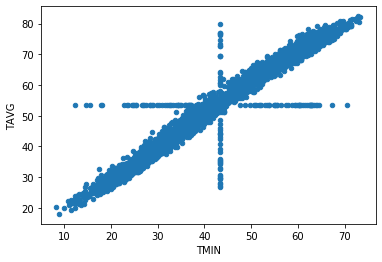

In [40]:
scatter_cols.plot.scatter(x='TMIN', y='TAVG')